In [58]:
import numpy as np
from skimage import io, color
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import os

In [68]:
def mean_shift_segmentation(file_path):
    # Load the image
    image = io.imread(file_path)
    image_lab = color.rgb2lab(image)  # Convert to LAB color space for better color clustering

    # Reshape the image to a 2D array of LAB color and XY position features
    h, w, c = image_lab.shape
    X = np.zeros((h * w, 5))  # Array to hold LAB and XY features
    X[:, :3] = image_lab.reshape(-1, 3)  # LAB color features
    X[:, 3] = np.repeat(np.arange(h), w)  # X coordinates
    X[:, 4] = np.tile(np.arange(w), h)    # Y coordinates

    # Estimate the bandwidth for mean shift based on data spread
    bandwidth = estimate_bandwidth(X, quantile=0.004, 
                                   n_samples=50000
                                   )
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

    # Apply Mean Shift clustering
    ms.fit(X)
    labels = ms.labels_.reshape(h, w)  # Reshape labels back to image dimensions

    # Create an output image where each cluster is colored by its mean color
    segmented_image = np.zeros_like(image_lab)
    for label in np.unique(labels):
        mask = (labels == label)
        segmented_image[mask] = np.mean(image_lab[mask], axis=0)

    # Convert segmented image back to RGB for visualization
    segmented_image_rgb = color.lab2rgb(segmented_image)

    # Visualize the result
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(mark_boundaries(image, labels))
    ax[0].set_title("Mean Shift Segmentation Boundaries")
    ax[0].axis("off")

    ax[1].imshow(segmented_image_rgb)
    ax[1].set_title("Segmented Image (Mean Colors)")
    ax[1].axis("off")

    plt.show()

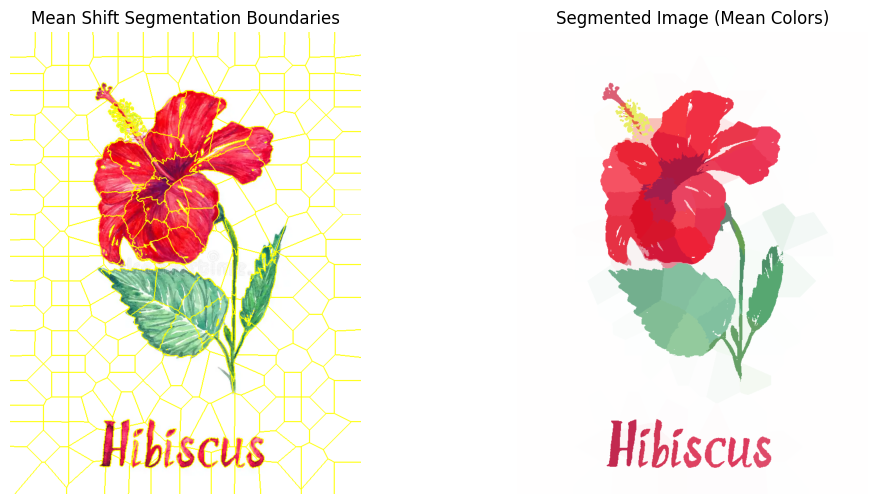

In [66]:
mean_shift_segmentation('hibiscus.jpeg')

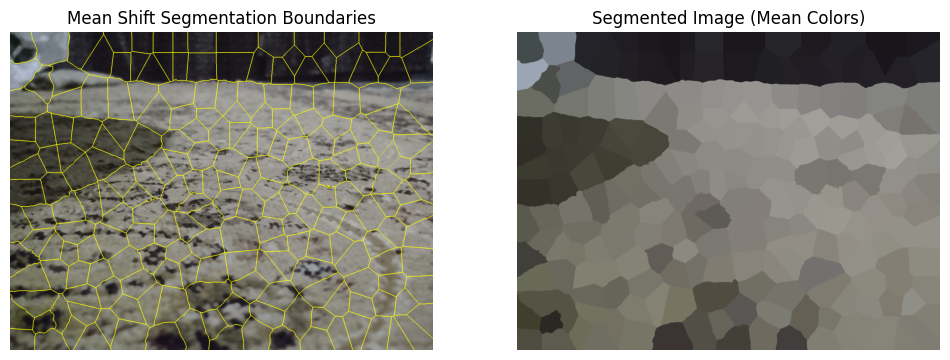

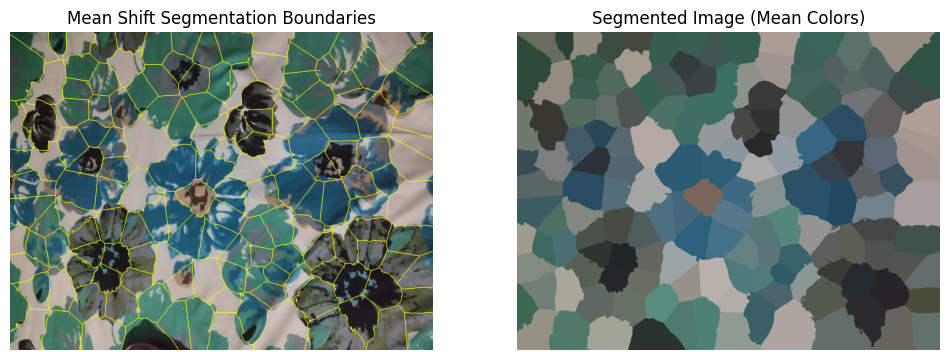

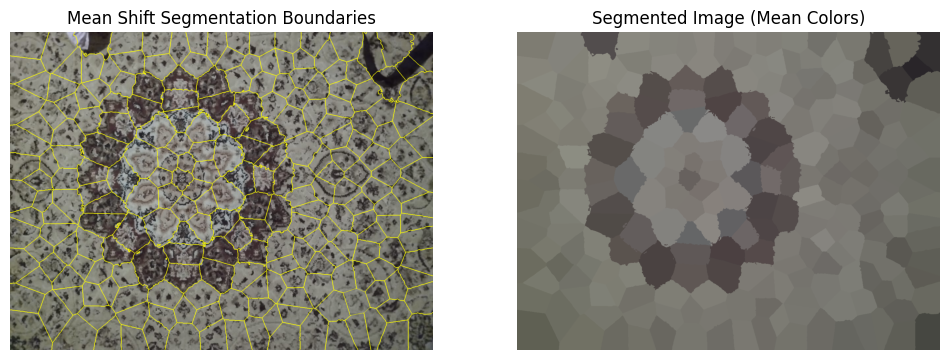

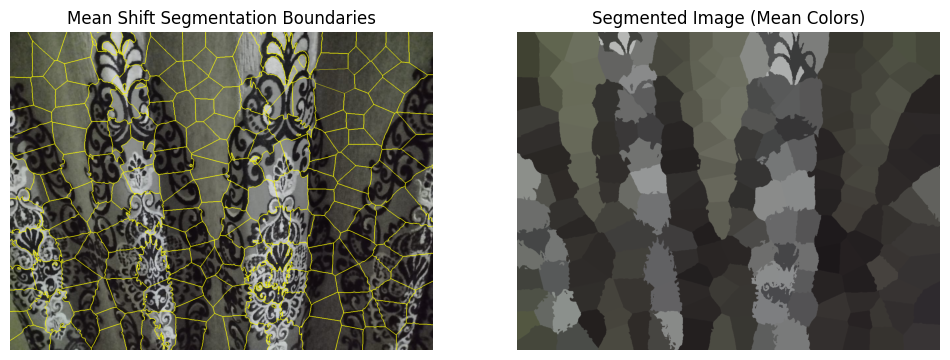

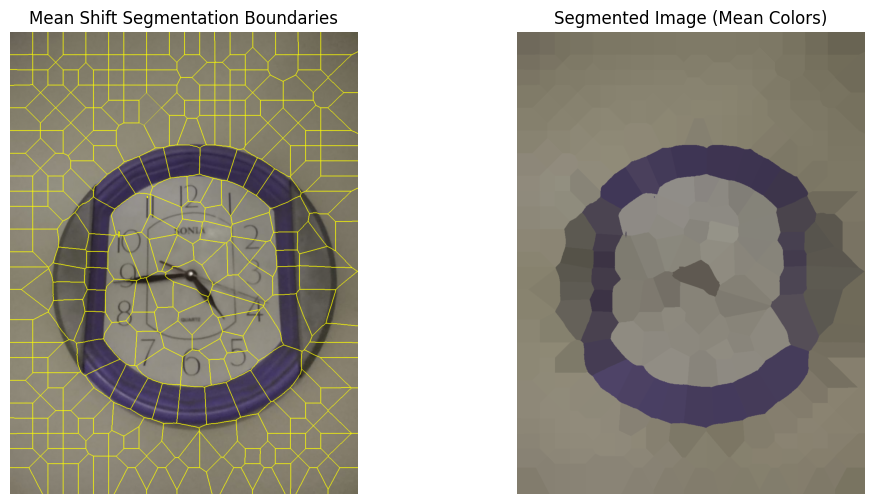

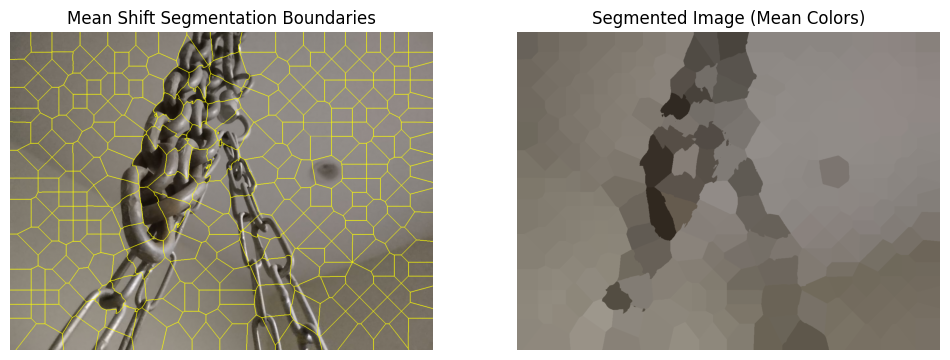

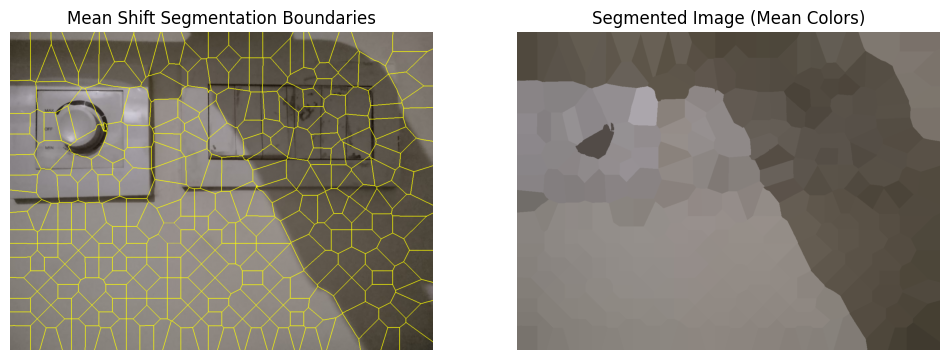

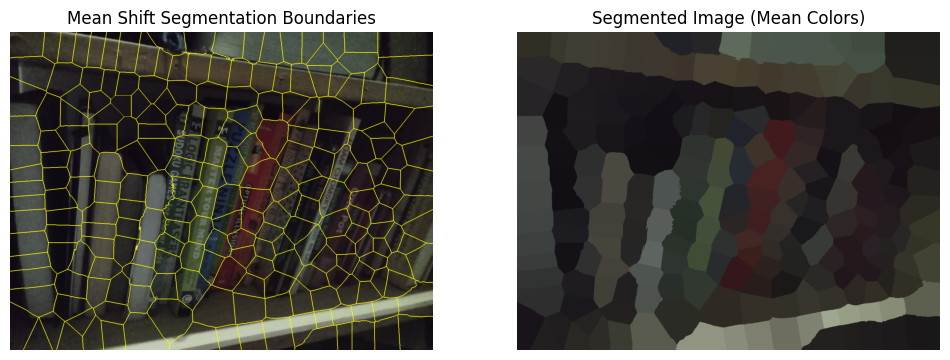

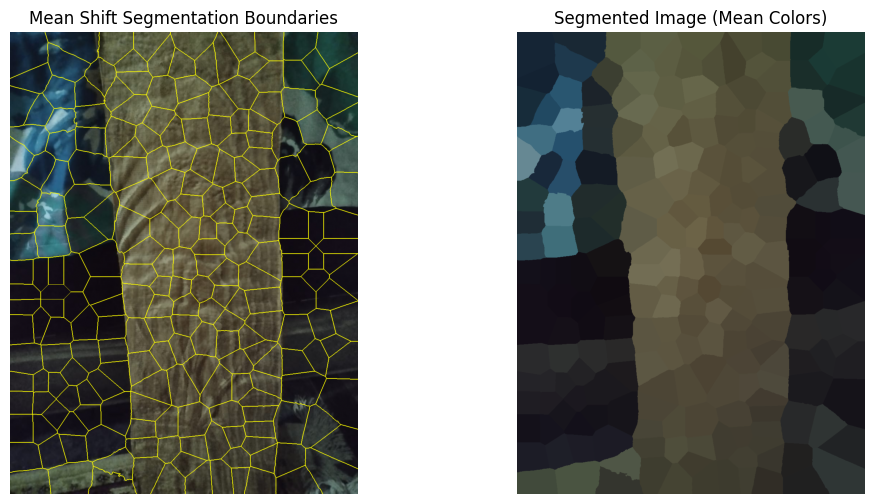

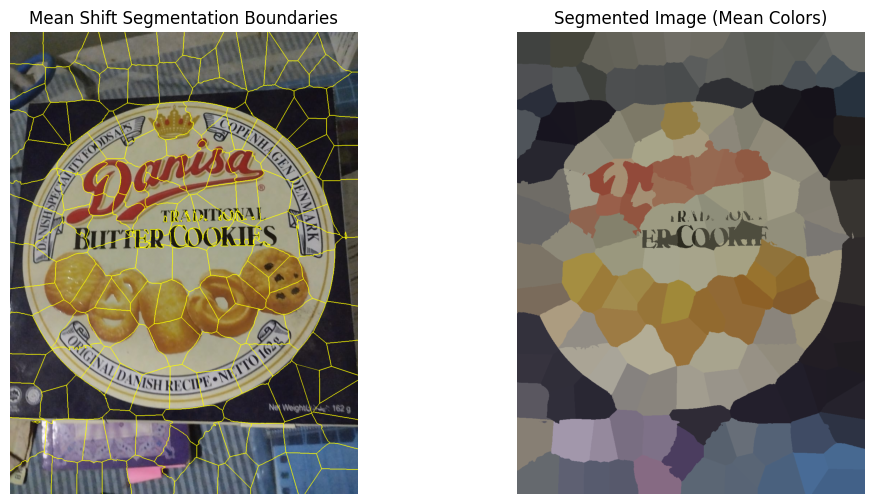

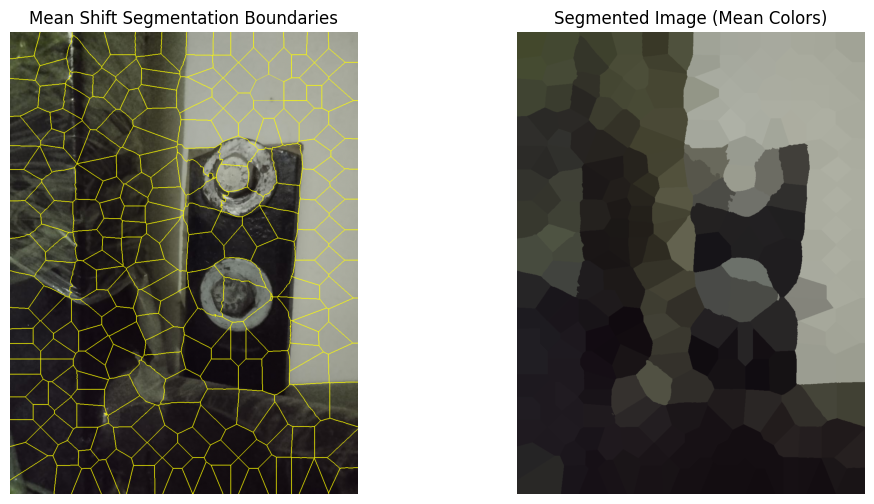

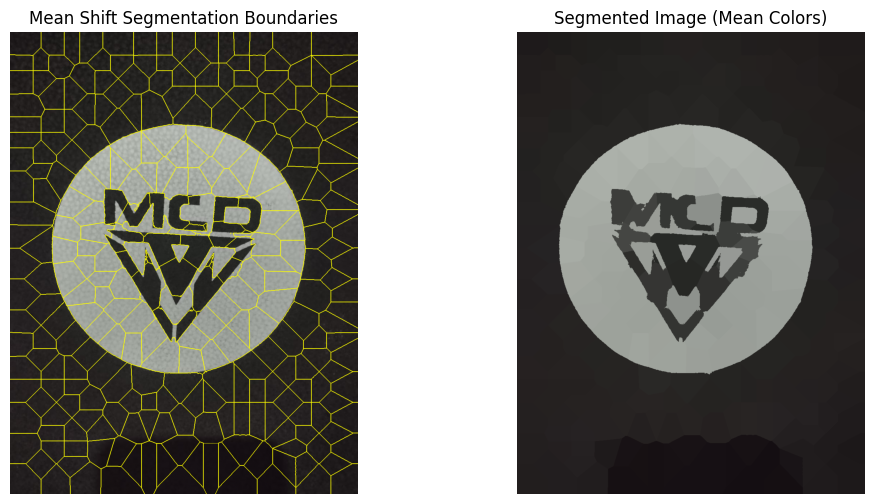

In [69]:
images_path = 'images'
ls = os.listdir(images_path)
ls.sort(reverse=True)
for filename in ls:
    mean_shift_segmentation(os.path.join(images_path, filename))

## What is the basic concept of MS Clustering?
The basic oncept of mean-shift clustering is to move the centers of the clusters towards areas of higher density or areas containing the most data-points.

## How MS compares with SLIC in terms of segmentation?
MS has better performance in image segmentation.

## Which one is faster for image segmentation?
SLIC is faster.